### Imports

In [1]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt

### Generating problems

In [2]:
#wmin - minimum item weight
#wmax - maximum item weight
#vmin - minimum item value
#vmax - maximum item value
#items_num - available number of items
def generate_problem(wmin, wmax, vmin, vmax, items_num):
    w = np.random.randint(wmin, wmax, size=items_num)  #weight
    v = np.random.randint(vmin, vmax, size=items_num)  #values
    return w, v

In [3]:
num = 50  # number of items
wmin = 1  
wmax = 100
vmin = 1
vmax = 100
# capacity as a percentage of the sum of the weights of all items
knapsack_perc = 0.5

np.random.seed(42)

w, v = generate_problem(wmin, wmax, vmin, vmax, num)
Wall = w.sum()
Vall = v.sum()
W = int(knapsack_perc * Wall) # capacity

print('Backpack capacity:', W)
print('Weigths:',w, 'Sum:', Wall)
print('Values:',v, 'Sum:', Vall)

Backpack capacity: 1255
Weigths: [52 93 15 72 61 21 83 87 75 75 88 24  3 22 53  2 88 30 38  2 64 60 21 33
 76 58 22 89 49 91 59 42 92 60 80 15 62 62 47 62 51 55 64  3 51  7 21 73
 39 18] Sum: 2510
Values: [ 4 89 60 14  9 90 53  2 84 92 60 71 44  8 47 35 78 81 36 50  4  2  6 54
  4 54 93 63 18 90 44 34 74 62 14 95 48 15 72 78 87 62 40 85 80 82 53 24
 26 89] Sum: 2559


### Solutions coding

In [4]:
num = w.shape[0]
sol = np.random.randint(0, 2, size=num, dtype=bool)

print('Solution:', sol)
print('List of items', np.arange(num)[sol])
print('Sum of weights:', w[sol].sum())
print('Sum of values:', v[sol].sum())

Solution: [ True  True False  True  True  True  True  True False  True False False
  True False  True False  True  True False  True False  True  True  True
  True  True  True False False False  True False  True  True False  True
  True  True False  True False False False  True  True False False  True
 False  True]
List of items [ 0  1  3  4  5  6  7  9 12 14 16 17 19 21 22 23 24 25 26 30 32 33 35 36
 37 39 43 44 47 49]
Sum of weights: 1547
Sum of values: 1560


### Generating random solutions

In [5]:
# if sum of weights exceed maximum backpack capacity than solution is forbidden
# so we have to remove items
def correct_solution(w, v, W, sol):
    num = w.shape[0]
    while w[sol].sum() > W:
        indx = np.random.randint(num)
        while sol[indx%num] == False:
            indx = indx + 1
        sol[indx%num] = False

In [6]:
def get_random_solution(w, v, W):
    num = w.shape[0]
    sol = np.random.randint(0,2, size=num, dtype=bool)  # 1 / True oznacza, ze przedmiot jest wybrany
    _V = np.sum(v[sol])
    _W = np.sum(w[sol])
    if _W > W:
        correct_solution(w,v,W,sol)
        _V = np.sum(v[sol])
        _W = np.sum(w[sol])
    return sol, _W, _V

### First attempt - Random search

In [7]:
def search_random(w,v,W,iters):
    best_sol, best_W, best_V = get_random_solution(w,v,W)
    v_all = [best_V]
    v_best = [best_V]
    for i in range(iters):
        sol, _W, _V = get_random_solution(w,v,W)
        if best_V < _V:
            best_sol, best_W, best_V = sol, _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    plt.figure()
    plt.plot(v_all, 'o')
    plt.plot(v_best)
    plt.show()
    return best_sol, best_W, best_V, v_all, v_best

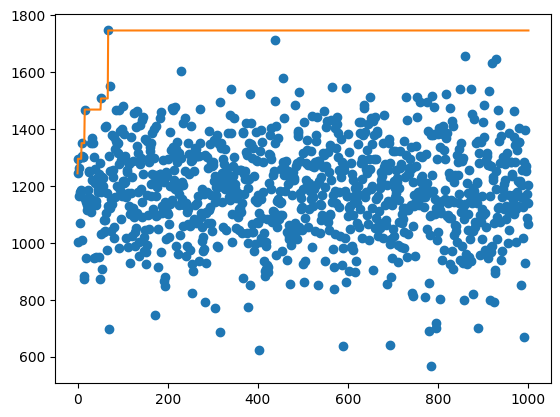

Best solution: [False  True False False False  True  True False False False False  True
  True  True False  True False  True False False False False  True  True
 False  True  True  True  True False  True False  True  True False  True
  True  True  True False  True  True  True  True  True  True  True False
 False  True]
Items: [ 1  5  6 11 12 13 15 17 22 23 25 26 27 28 30 32 33 35 36 37 38 40 41 42
 43 44 45 46 49]
Sum of weights: 1217
Sum of values: 1747


In [8]:
sol_random_search = search_random(w, v, W, 1000)

print('Best solution:',sol_random_search[0])
print('Items:',np.arange(num)[sol_random_search[0]])
print('Sum of weights:', sol_random_search[1])
print('Sum of values:', sol_random_search[2])

### Second attempt - Greedy search

In [9]:
def search_greedy_improvement(w, v, W, iters):
    best_sol, best_W, best_V = get_random_solution(w,v,W)
    v_all = [best_V]
    v_best = [best_V]
    num = w.shape[0]
    for i in range(iters):
        sol = best_sol.copy()
        #set random 0 bit to 1
        indx = np.random.randint(num)
        while sol[indx%num] == True:
            indx = indx + 1
        sol[indx%num] = True
        #correct if needed
        if w[sol].sum() > W:
            correct_solution(w,v,W,sol)
        _V = v[sol].sum()
        _W = w[sol].sum()
        if best_V < _V:
            best_sol, best_W, best_V = sol.copy(), _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    plt.figure()
    plt.plot(v_all)
    plt.plot(v_best)
    plt.show()
    return best_sol, best_W, best_V, v_all, v_best

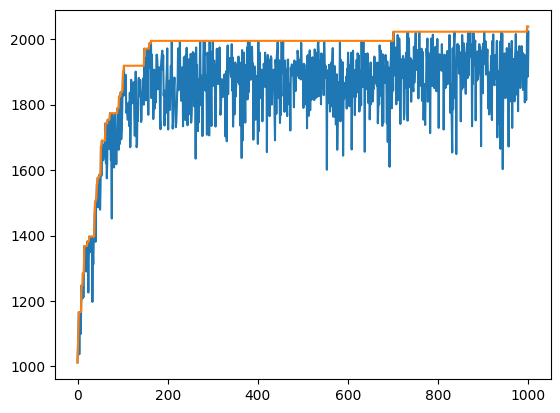

Best solution [False False  True False False  True False False  True  True False  True
  True  True  True  True  True  True  True  True False False False  True
 False False  True  True False  True  True  True False  True False  True
 False False  True  True  True  True  True  True  True  True  True False
 False  True]
Items: [ 2  5  8  9 11 12 13 14 15 16 17 18 19 23 26 27 29 30 31 33 35 38 39 40
 41 42 43 44 45 46 49]
Sum of weigths: 1238
Sum of values: 2039


In [10]:
sol_greedy = search_greedy_improvement(w,v,W,1000)

print('Best solution',sol_greedy[0])
print('Items:',np.arange(num)[sol_greedy[0]])
print('Sum of weigths:', sol_greedy[1])
print('Sum of values:', sol_greedy[2])

### Genetic Algorithm

In [11]:
# function that generates random population
def gen_pop(w, v, W, pop_size):
  pop = (np.random.randint(2, size=(pop_size, len(w))) == 1)
  return pop

# function that evaluates population
def evaluate(pop, v):
  evaluated_pop = np.apply_along_axis(lambda x: np.sum(v[x.astype(np.bool_)]), 1, pop)
  return evaluated_pop

# roulette to choose next generation
def select(pop, evals):
  evals += np.absolute(evals.min()) + 1
  evals = np.divide(evals, np.sum(evals))
  new_pop_ind = np.random.choice(pop.shape[0], size=pop.shape[0], p=evals)
  new_pop = pop[new_pop_ind, :]
  return new_pop

# function that implements crossing
def xover(pop, p, w,v,W):  # p - crossing probability
    ind = 0
    m = pop.shape[0]
    n = pop.shape[1]
    new_pop = np.array([None] * m * n).reshape((m, n))

    if m % 2 == 1:
      np.copyto(new_pop[0], pop[0])
      ind += 1

    for i in range(ind, m, 2):
      if random.uniform(0, 1) < p:
        np.copyto(new_pop[i], np.append(pop[i][:n//2], pop[i+1][n//2:]))
        np.copyto(new_pop[i+1], np.append(pop[i+1][:n//2], pop[i][n//2:]))
      else:
        np.copyto(new_pop[i], pop[i])
        np.copyto(new_pop[i+1], pop[i+1])

    return new_pop

# function that implements mutation
def mutate(pop, p, w, v, W):  # p - mutation probability
    new_pop = np.bitwise_xor(pop, np.random.choice([1, 0], size=pop.shape, p=[p, 1-p]))
    return new_pop

"""def correct(pop, w, v, W):
    num = w.shape[0]
    for sol in pop:
      while w[sol.astype(np.bool8)].sum() > W:
          indx = np.random.randint(num)
          while sol[indx%num] == False:
              indx = indx + 1
          sol[indx%num] = False"""

# better correction function that first removes least valuable (weight to value ratio) items
def better_correct(pop, w, v, W):
    num = w.shape[0]
    sorted_to_remove = np.argsort(v/w)
    for sol in pop:
      can_remove = sorted_to_remove[sol.astype(np.bool_)]
      while w[sol.astype(np.bool_)].sum() > W:
        sol[can_remove[0]] = False
        can_remove = can_remove[1:]

In [12]:
# main evolve function
def evolve_knapsack(w, v, W, pop_size, pxover, pmutate, generations):
    pop = gen_pop(w,v,W, pop_size)
    # correct(pop, w, v, W)
    better_correct(pop, w, v, W)
    evals = evaluate(pop, v)
    i = np.argmax(evals)
    best = pop[i].copy()
    best_V = evals[i]
    best_iter = 0
    v_all = [best_V]
    v_best = [best_V]
    v_mean = [np.mean(evals)]
    
    for i in range(generations):
        pop = select(pop, evals)
        pop = xover(pop, pxover, w,v,W)
        pop = mutate(pop, pmutate, w,v,W)
        # correct(pop, w, v, W)
        better_correct(pop, w, v, W)
        evals = evaluate(pop, v)
        ii = np.argmax(evals)
        temp_best_v = evals[ii]
        if temp_best_v > best_V:
            best_V = temp_best_v
            best_iter = i+1
            best = pop[ii].copy()
        v_all.append(temp_best_v)
        v_best.append(best_V)
        v_mean.append(np.mean(evals))

    return best.astype(np.bool_), w[best.astype(np.bool_)].sum(), best_V

In [13]:
sol_genetic = evolve_knapsack(w, v, W, 100, 0.7, 0.05, 250)

print('Best solution',sol_genetic[0])
print('Items:',np.arange(num)[sol_genetic[0]])
print('Sum of weigths:', sol_genetic[1])
print('Sum of values:', sol_genetic[2])

Best solution [False  True  True False False  True False False  True  True False  True
  True False  True  True  True  True  True  True False False False False
 False  True  True False False  True False False  True False  True  True
 False False  True  True  True  True False  True  True  True  True False
 False  True]
Items: [ 1  2  5  8  9 11 12 14 15 16 17 18 19 25 26 29 32 34 35 38 39 40 41 43
 44 45 46 49]
Sum of weigths: 1192
Sum of values: 1965


### Comparison

In [14]:
def better_correct_solution(w, v, W, sol):
    num = w.shape[0]
    sorted_to_remove = np.argsort(v/w)
    can_remove = sorted_to_remove[sol]
    while w[sol].sum() > W:
        sol[can_remove[0]] = False
        can_remove = can_remove[1:]

def search_greedy_improvement(w, v, W, iters):
    best_sol, best_W, best_V = get_random_solution(w,v,W)
    v_all = [best_V]
    v_best = [best_V]
    num = w.shape[0]
    for i in range(iters):
        sol = best_sol.copy()
        #set random 0 bit to 1
        indx = np.random.randint(num)
        while sol[indx%num] == True:
            indx = indx + 1
        sol[indx%num] = True
        #correct if needed
        if w[sol].sum() > W:
            better_correct_solution(w,v,W,sol)
        _V = v[sol].sum()
        _W = w[sol].sum()
        if best_V < _V:
            best_sol, best_W, best_V = sol.copy(), _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    return best_sol, best_W, best_V, v_all, v_best

In [16]:
w, v = generate_problem(wmin, wmax, vmin, vmax, items_num=50)
Wall = w.sum()
Vall = v.sum()
W = int(knapsack_perc * Wall)

np.random.seed(int(time.time()))

res = []
for i in range(10):
    best_sol, best_W, best_V = evolve_knapsack(w, v, W, 2000, 0.7, 0.03, 1000)
    res.append(best_V)
    
res_arr = np.array([res])
print("Genetic:")
print("Average: " + str(res_arr.mean()))
print("Std.: " + str(res_arr.std()))

res = []
for i in range(10):
    best_sol, best_W, best_V, v_all, v_best = search_greedy_improvement(w,v,W,1000)
    res.append(best_V)

res_arr = np.array([res])
print("GreedySearch:")
print("Average: " + str(res_arr.mean()))
print("Std.: " + str(res_arr.std()))

Genetic:
Average: 1967.7
Std.: 11.13597772986279
GreedySearch:
Average: 1947.2
Std.: 29.2123261655076
